# Getting started with gaze dataset 

In this example, we will show examples of the main functionalities included in the emtk.

This includes:
- Parsing raw data from the gaze dataset to pandas dataframe.
- Visualizing raw data, filtered fixation, saccades, and AOIs visualization.
- Applying fixation correction through setting offset.
- Generating AOIs for any gaze stimuli.
- Adding text tokens to generated AOIs.
- Adding srcML tags to AOIs and tokens.
- Performing hit test between fixations and AOIs. 

In [10]:
%load_ext autoreload
%autoreload 2  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing the tool

In [11]:
import pandas as pd
from g2c import parsers, visualization, util, aoi

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Parsing raw data from the dataset

In [3]:
# eye_events, samples = parsers.UNL_UM(sample_size = 50)
eye_events, samples = parsers.YMU_UM(sample_size = 100)

Processing files:   1%|          | 1/83 [00:00<01:11,  1.14file/s]

Processed file: YMU-UM Recording10.tsv


Processing files:   2%|▏         | 2/83 [00:02<01:34,  1.16s/file]

Processed file: YMU-UM Recording11.tsv


Processing files:   4%|▎         | 3/83 [00:04<02:10,  1.63s/file]

Processed file: YMU-UM Recording12.tsv


Processing files:   5%|▍         | 4/83 [00:06<02:34,  1.96s/file]

Processed file: YMU-UM Recording13.tsv


Processing files:   6%|▌         | 5/83 [00:09<02:57,  2.27s/file]

Processed file: YMU-UM Recording14.tsv


Processing files:   7%|▋         | 6/83 [00:13<03:22,  2.62s/file]

Processed file: YMU-UM Recording15.tsv


Processing files:   8%|▊         | 7/83 [00:16<03:42,  2.93s/file]

Processed file: YMU-UM Recording16.tsv


Processing files:  10%|▉         | 8/83 [00:20<04:01,  3.22s/file]

Processed file: YMU-UM Recording17.tsv


Processing files:  11%|█         | 9/83 [00:24<04:16,  3.46s/file]

Processed file: YMU-UM Recording18.tsv


Processing files:  12%|█▏        | 10/83 [00:28<04:29,  3.69s/file]

Processed file: YMU-UM Recording19.tsv


Processing files:  13%|█▎        | 11/83 [00:32<04:38,  3.87s/file]

Processed file: YMU-UM Recording2.tsv


Processing files:  14%|█▍        | 12/83 [00:37<05:00,  4.23s/file]

Processed file: YMU-UM Recording20.tsv


Processing files:  16%|█▌        | 13/83 [00:43<05:33,  4.76s/file]

Processed file: YMU-UM Recording21.tsv


Processing files:  17%|█▋        | 14/83 [00:50<06:00,  5.22s/file]

Processed file: YMU-UM Recording22.tsv


Processing files:  18%|█▊        | 15/83 [00:56<06:22,  5.62s/file]

Processed file: YMU-UM Recording23.tsv


Processing files:  19%|█▉        | 16/83 [01:03<06:31,  5.84s/file]

Processed file: YMU-UM Recording24.tsv


Processing files:  20%|██        | 17/83 [01:11<07:07,  6.48s/file]

Processed file: YMU-UM Recording25.tsv


Processing files:  22%|██▏       | 18/83 [01:18<07:25,  6.86s/file]

Processed file: YMU-UM Recording26.tsv


Processing files:  23%|██▎       | 19/83 [01:26<07:41,  7.20s/file]

Processed file: YMU-UM Recording27.tsv


Processing files:  24%|██▍       | 20/83 [01:34<07:48,  7.44s/file]

Processed file: YMU-UM Recording28.tsv


Processing files:  25%|██▌       | 21/83 [01:43<08:04,  7.82s/file]

Processed file: YMU-UM Recording29.tsv


Processing files:  27%|██▋       | 22/83 [01:52<08:12,  8.07s/file]

Processed file: YMU-UM Recording3.tsv


Processing files:  28%|██▊       | 23/83 [02:01<08:25,  8.43s/file]

Processed file: YMU-UM Recording30.tsv


Processing files:  29%|██▉       | 24/83 [02:11<08:43,  8.86s/file]

Processed file: YMU-UM Recording31.tsv


Processing files:  30%|███       | 25/83 [02:21<08:53,  9.20s/file]

Processed file: YMU-UM Recording32.tsv


Processing files:  31%|███▏      | 26/83 [02:31<08:59,  9.46s/file]

Processed file: YMU-UM Recording33.tsv


Processing files:  33%|███▎      | 27/83 [02:42<09:09,  9.82s/file]

Processed file: YMU-UM Recording34.tsv


Processing files:  34%|███▎      | 28/83 [02:52<09:12, 10.05s/file]

Processed file: YMU-UM Recording35.tsv


Processing files:  35%|███▍      | 29/83 [03:03<09:21, 10.41s/file]

Processed file: YMU-UM Recording36.tsv


Processing files:  36%|███▌      | 30/83 [03:16<09:40, 10.95s/file]

Processed file: YMU-UM Recording37.tsv


Processing files:  37%|███▋      | 31/83 [03:28<09:52, 11.39s/file]

Processed file: YMU-UM Recording38.tsv


Processing files:  39%|███▊      | 32/83 [03:41<10:02, 11.82s/file]

Processed file: YMU-UM Recording39.tsv


Processing files:  40%|███▉      | 33/83 [03:54<10:06, 12.14s/file]

Processed file: YMU-UM Recording4.tsv


Processing files:  41%|████      | 34/83 [04:07<10:07, 12.41s/file]

Processed file: YMU-UM Recording40.tsv


Processing files:  42%|████▏     | 35/83 [04:20<10:10, 12.71s/file]

Processed file: YMU-UM Recording41.tsv


Processing files:  43%|████▎     | 36/83 [04:33<10:02, 12.81s/file]

Processed file: YMU-UM Recording42.tsv


Processing files:  45%|████▍     | 37/83 [04:48<10:11, 13.29s/file]

Processed file: YMU-UM Recording43.tsv


Processing files:  46%|████▌     | 38/83 [05:02<10:11, 13.60s/file]

Processed file: YMU-UM Recording44.tsv


Processing files:  47%|████▋     | 39/83 [05:17<10:12, 13.91s/file]

Processed file: YMU-UM Recording45.tsv


Processing files:  48%|████▊     | 40/83 [05:32<10:12, 14.23s/file]

Processed file: YMU-UM Recording46.tsv


Processing files:  49%|████▉     | 41/83 [05:47<10:09, 14.52s/file]

Processed file: YMU-UM Recording47.tsv


Processing files:  51%|█████     | 42/83 [06:02<10:03, 14.72s/file]

Processed file: YMU-UM Recording48.tsv


Processing files:  52%|█████▏    | 43/83 [06:17<09:56, 14.90s/file]

Processed file: YMU-UM Recording49.tsv


Processing files:  53%|█████▎    | 44/83 [06:33<09:48, 15.10s/file]

Processed file: YMU-UM Recording5.tsv


Processing files:  54%|█████▍    | 45/83 [06:49<09:48, 15.50s/file]

Processed file: YMU-UM Recording50.tsv


Processing files:  55%|█████▌    | 46/83 [07:06<09:43, 15.78s/file]

Processed file: YMU-UM Recording51.tsv


Processing files:  57%|█████▋    | 47/83 [07:23<09:39, 16.09s/file]

Processed file: YMU-UM Recording52.tsv


Processing files:  58%|█████▊    | 48/83 [07:39<09:31, 16.34s/file]

Processed file: YMU-UM Recording53.tsv


Processing files:  59%|█████▉    | 49/83 [07:57<09:26, 16.67s/file]

Processed file: YMU-UM Recording54.tsv


Processing files:  60%|██████    | 50/83 [08:14<09:17, 16.91s/file]

Processed file: YMU-UM Recording55.tsv


Processing files:  61%|██████▏   | 51/83 [08:32<09:08, 17.15s/file]

Processed file: YMU-UM Recording56.tsv


Processing files:  63%|██████▎   | 52/83 [08:50<09:02, 17.50s/file]

Processed file: YMU-UM Recording57.tsv


Processing files:  64%|██████▍   | 53/83 [09:09<08:57, 17.91s/file]

Processed file: YMU-UM Recording58.tsv


Processing files:  65%|██████▌   | 54/83 [09:28<08:49, 18.27s/file]

Processed file: YMU-UM Recording59.tsv


Processing files:  66%|██████▋   | 55/83 [09:48<08:39, 18.56s/file]

Processed file: YMU-UM Recording6.tsv


Processing files:  67%|██████▋   | 56/83 [10:07<08:29, 18.88s/file]

Processed file: YMU-UM Recording60.tsv


Processing files:  69%|██████▊   | 57/83 [10:28<08:28, 19.56s/file]

Processed file: YMU-UM Recording61.tsv


Processing files:  70%|██████▉   | 58/83 [10:49<08:19, 19.99s/file]

Processed file: YMU-UM Recording62.tsv


Processing files:  71%|███████   | 59/83 [10:50<05:38, 14.10s/file]

Stimuli not found or error in file: YMU-UM Recording63.tsv | Error: Expected 7 unique stimuli, found 6


Processing files:  72%|███████▏  | 60/83 [11:10<06:10, 16.11s/file]

Processed file: YMU-UM Recording64.tsv


Processing files:  73%|███████▎  | 61/83 [11:31<06:25, 17.52s/file]

Processed file: YMU-UM Recording65.tsv


Processing files:  75%|███████▍  | 62/83 [11:52<06:30, 18.58s/file]

Processed file: YMU-UM Recording66.tsv


Processing files:  76%|███████▌  | 63/83 [12:13<06:25, 19.30s/file]

Processed file: YMU-UM Recording67.tsv


Processing files:  77%|███████▋  | 64/83 [12:36<06:24, 20.23s/file]

Processed file: YMU-UM Recording68.tsv


Processing files:  78%|███████▊  | 65/83 [12:58<06:14, 20.78s/file]

Processed file: YMU-UM Recording69.tsv


Processing files:  80%|███████▉  | 66/83 [13:20<06:00, 21.21s/file]

Processed file: YMU-UM Recording7.tsv


Processing files:  81%|████████  | 67/83 [13:43<05:45, 21.62s/file]

Processed file: YMU-UM Recording70.tsv


Processing files:  82%|████████▏ | 68/83 [14:05<05:26, 21.75s/file]

Processed file: YMU-UM Recording71.tsv


Processing files:  83%|████████▎ | 69/83 [14:28<05:09, 22.12s/file]

Processed file: YMU-UM Recording72.tsv


Processing files:  84%|████████▍ | 70/83 [14:54<05:02, 23.27s/file]

Processed file: YMU-UM Recording73.tsv


Processing files:  86%|████████▌ | 71/83 [15:20<04:49, 24.11s/file]

Processed file: YMU-UM Recording74.tsv


Processing files:  87%|████████▋ | 72/83 [15:46<04:31, 24.65s/file]

Processed file: YMU-UM Recording75.tsv


Processing files:  88%|████████▊ | 73/83 [16:11<04:08, 24.82s/file]

Processed file: YMU-UM Recording76.tsv


Processing files:  89%|████████▉ | 74/83 [16:37<03:47, 25.25s/file]

Processed file: YMU-UM Recording77.tsv


Processing files:  90%|█████████ | 75/83 [17:04<03:25, 25.66s/file]

Processed file: YMU-UM Recording78.tsv


Processing files:  92%|█████████▏| 76/83 [17:31<03:02, 26.12s/file]

Processed file: YMU-UM Recording79.tsv


Processing files:  93%|█████████▎| 77/83 [17:57<02:37, 26.26s/file]

Processed file: YMU-UM Recording8.tsv


Processing files:  94%|█████████▍| 78/83 [18:25<02:13, 26.75s/file]

Processed file: YMU-UM Recording80.tsv


Processing files:  95%|█████████▌| 79/83 [18:53<01:47, 26.93s/file]

Processed file: YMU-UM Recording81.tsv


Processing files:  96%|█████████▋| 80/83 [19:21<01:21, 27.33s/file]

Processed file: YMU-UM Recording82.tsv


Processing files:  98%|█████████▊| 81/83 [19:49<00:55, 27.52s/file]

Processed file: YMU-UM Recording83.tsv


Processing files:  99%|█████████▉| 82/83 [20:19<00:28, 28.17s/file]

Processed file: YMU-UM Recording84.tsv


Processing files: 100%|██████████| 83/83 [20:48<00:00, 15.04s/file]

Processed file: YMU-UM Recording9.tsv


In [12]:
samples.head()

eye_tracker  experiment_id participant_id  \
0  Tobii I-VT (Fixation)  Participant10  Participant10   
1  Tobii I-VT (Fixation)  Participant10  Participant10   
2  Tobii I-VT (Fixation)  Participant10  Participant10   
3  Tobii I-VT (Fixation)  Participant10  Participant10   
4  Tobii I-VT (Fixation)  Participant10  Participant10   

                 filename         trial_id           stimuli_module  \
0  YMU-UM Recording10.tsv  introduction-Q3  datasets/YMU_UM/stimuli   
1  YMU-UM Recording10.tsv  introduction-Q3  datasets/YMU_UM/stimuli   
2  YMU-UM Recording10.tsv  introduction-Q3  datasets/YMU_UM/stimuli   
3  YMU-UM Recording10.tsv  introduction-Q3  datasets/YMU_UM/stimuli   
4  YMU-UM Recording10.tsv  introduction-Q3  datasets/YMU_UM/stimuli   

          stimuli_name  Recording timestamp Project name Export date  ...  \
0  introduction-Q3.png            122982715       YMU-UM   2025/7/24  ...   
1  introduction-Q3.png            122991536       YMU-UM   2025/7/24  ...   
2  introduction-Q3.png            123008192       YMU-UM   2025/7/24  ...   
3  introduction-Q3.png            123024846       YMU-UM   2025/7/24  ...   
4  introduction-Q3.png            123041501       YMU-UM   2025/7/24  ...   

  Mapped fixation Y [Q3]  Mapped fixation X [Q4A] Mapped fixation Y [Q4A]  \
0                    NaN                      NaN                     NaN   
1                    NaN                      NaN                     NaN   
2                    NaN                      NaN                     NaN   
3                    NaN                      NaN                     NaN   
4                    NaN                      NaN                     NaN   

  Mapped fixation X [Q4B] Mapped fixation Y [Q4B] Mapped fixation X [Q5]  \
0                     NaN                     NaN                    NaN   
1                     NaN                     NaN                    NaN   
2                     NaN                     NaN                    NaN   
3                     NaN                     NaN                    NaN   
4                     NaN                     NaN                    NaN   

  Mapped fixation Y [Q5] Eye movement type  Gaze event duration  \
0                    NaN          Fixation                550.0   
1                    NaN          Fixation                550.0   
2                    NaN          Fixation                550.0   
3                    NaN          Fixation                550.0   
4                    NaN          Fixation                550.0   

  Eye movement type index  
0                   237.0  
1                   237.0  
2                   237.0  
3                   237.0  
4                   237.0  

[5 rows x 171 columns]

In [13]:
eye_events.head()

eye_tracker  experiment_id participant_id  \
0  Tobii I-VT (Fixation)  Participant10  Participant10   
1  Tobii I-VT (Fixation)  Participant10  Participant10   
2  Tobii I-VT (Fixation)  Participant10  Participant10   
3  Tobii I-VT (Fixation)  Participant10  Participant10   
4  Tobii I-VT (Fixation)  Participant10  Participant10   

                 filename         trial_id           stimuli_module  \
0  YMU-UM Recording10.tsv  introduction-Q3  datasets/YMU_UM/stimuli   
1  YMU-UM Recording10.tsv  introduction-Q3  datasets/YMU_UM/stimuli   
2  YMU-UM Recording10.tsv  introduction-Q3  datasets/YMU_UM/stimuli   
3  YMU-UM Recording10.tsv  introduction-Q3  datasets/YMU_UM/stimuli   
4  YMU-UM Recording10.tsv  introduction-Q3  datasets/YMU_UM/stimuli   

          stimuli_name  timestamp  duration     x0     y0  x1  y1 token  \
0  introduction-Q3.png  122982715     550.0  975.0  271.0 NaN NaN  None   
1  introduction-Q3.png  122991536     550.0  975.0  271.0 NaN NaN  None   
2  introduction-Q3.png  123008192     550.0  975.0  271.0 NaN NaN  None   
3  introduction-Q3.png  123024846     550.0  975.0  271.0 NaN NaN  None   
4  introduction-Q3.png  123041501     550.0  975.0  271.0 NaN NaN  None   

   pupil_l  pupil_r  amplitude  peak_velocity eye_event_type  
0      NaN      NaN        NaN            NaN       fixation  
1    3.255    3.164        NaN            NaN       fixation  
2    3.250    3.144        NaN            NaN       fixation  
3    3.251    3.140        NaN            NaN       fixation  
4    3.250    3.130        NaN            NaN       fixation

# Visualization

### For Individual

In [14]:
experiment_id = "Participant52"
trial_id = 'introduction-Q5'

### Draw Fixations

In [15]:
trial_data = eye_events.loc[(eye_events['experiment_id'] == experiment_id) & 
                            (eye_events['trial_id'] == trial_id)]

samples_data = samples.loc[(samples['experiment_id'] == experiment_id) & 
                            (samples['trial_id'] == trial_id)]

In [16]:
trial_data.head()

eye_tracker  experiment_id participant_id  \
1743501  Tobii I-VT (Fixation)  Participant52  Participant52   
1743502  Tobii I-VT (Fixation)  Participant52  Participant52   
1743503  Tobii I-VT (Fixation)  Participant52  Participant52   
1743504  Tobii I-VT (Fixation)  Participant52  Participant52   
1743505  Tobii I-VT (Fixation)  Participant52  Participant52   

                       filename         trial_id           stimuli_module  \
1743501  YMU-UM Recording52.tsv  introduction-Q5  datasets/YMU_UM/stimuli   
1743502  YMU-UM Recording52.tsv  introduction-Q5  datasets/YMU_UM/stimuli   
1743503  YMU-UM Recording52.tsv  introduction-Q5  datasets/YMU_UM/stimuli   
1743504  YMU-UM Recording52.tsv  introduction-Q5  datasets/YMU_UM/stimuli   
1743505  YMU-UM Recording52.tsv  introduction-Q5  datasets/YMU_UM/stimuli   

                stimuli_name  timestamp  duration     x0     y0  x1  y1 token  \
1743501  introduction-Q5.png  519981913     300.0  575.0  212.0 NaN NaN  None   
1743502  introduction-Q5.png  519991462     300.0  575.0  212.0 NaN NaN  None   
1743503  introduction-Q5.png  519991769     300.0  575.0  212.0 NaN NaN  None   
1743504  introduction-Q5.png  520008116     300.0  575.0  212.0 NaN NaN  None   
1743505  introduction-Q5.png  520024771     300.0  575.0  212.0 NaN NaN  None   

         pupil_l  pupil_r  amplitude  peak_velocity eye_event_type  
1743501      NaN      NaN        NaN            NaN       fixation  
1743502    3.189    3.239        NaN            NaN       fixation  
1743503      NaN      NaN        NaN            NaN       fixation  
1743504    3.174    3.224        NaN            NaN       fixation  
1743505    3.169    3.234        NaN            NaN       fixation

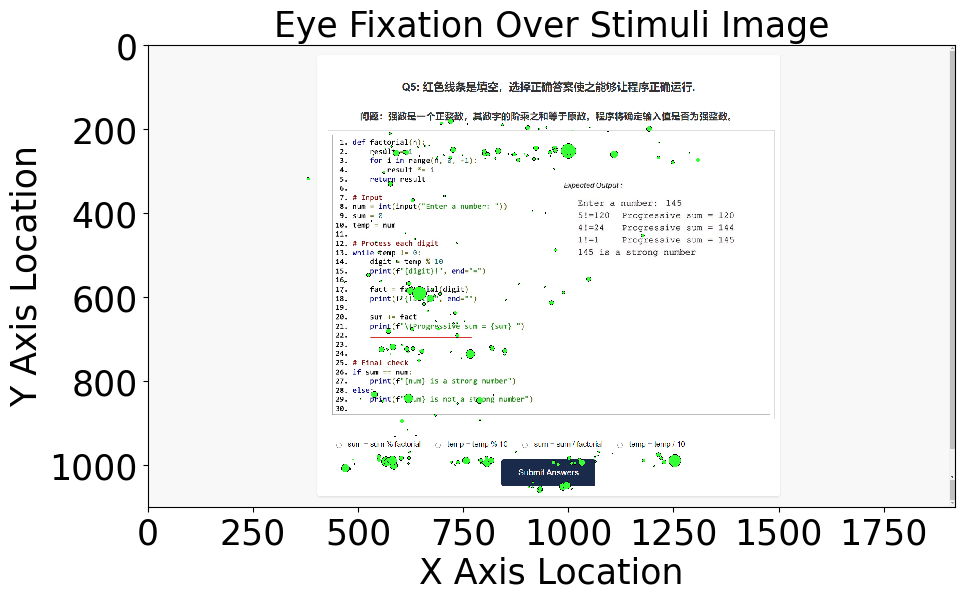

In [104]:
visualization.draw_trial(trial_data, samples_data, 
                         draw_raw_data=False, draw_fixation=True,
                        draw_saccade=False, draw_aoi=False, 
                        sample_x_col="Gaze point X [DACS px]",
                        sample_y_col="Gaze point Y [DACS px]",
                        r3=3, r5=1)

### For group

In [81]:
trial_id = 'introduction-Q5'

In [82]:
trial_data = eye_events.loc[eye_events['trial_id'] == trial_id]

samples_data = samples.loc[samples['trial_id'] == trial_id]


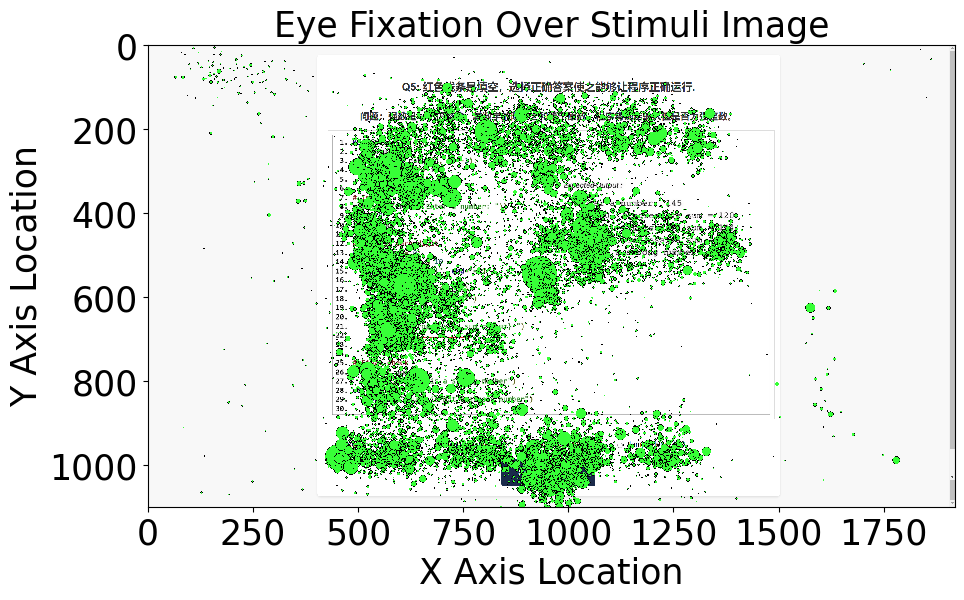

In [98]:
visualization.draw_trial(trial_data, samples_data, 
                         draw_raw_data=False, draw_fixation=True,
                        draw_saccade=False, draw_aoi=False, 
                        sample_x_col="Gaze point X [DACS px]",
                        sample_y_col="Gaze point Y [DACS px]",
                        r3=3,r5=.8)

# Heatmap

### By Participant 

In [25]:
experiment_id = "Participant52"
trial_id = 'introduction-Q5'

### Draw Individual Heatmap

In [18]:
# load the data
# clearn the data
trial_data = pd.DataFrame()
trial_data = eye_events.loc[(eye_events['experiment_id'] == experiment_id) & 
                            (eye_events['trial_id'] == trial_id)]

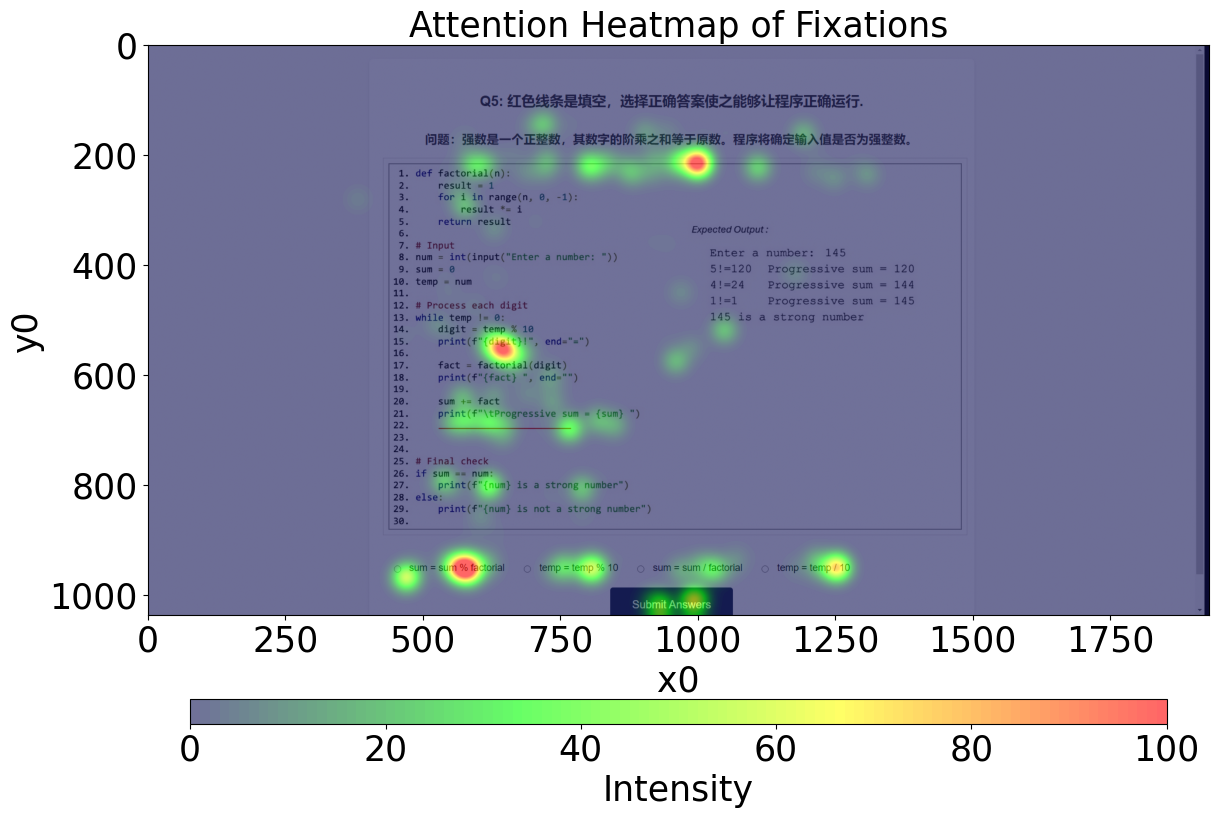

In [19]:
visualization.draw_heatmap(trial_data,contours=False,
                           figsize=(18, 10), alpha=0.6, sigma_value=17, 
                           vmin=0, vmax=100)

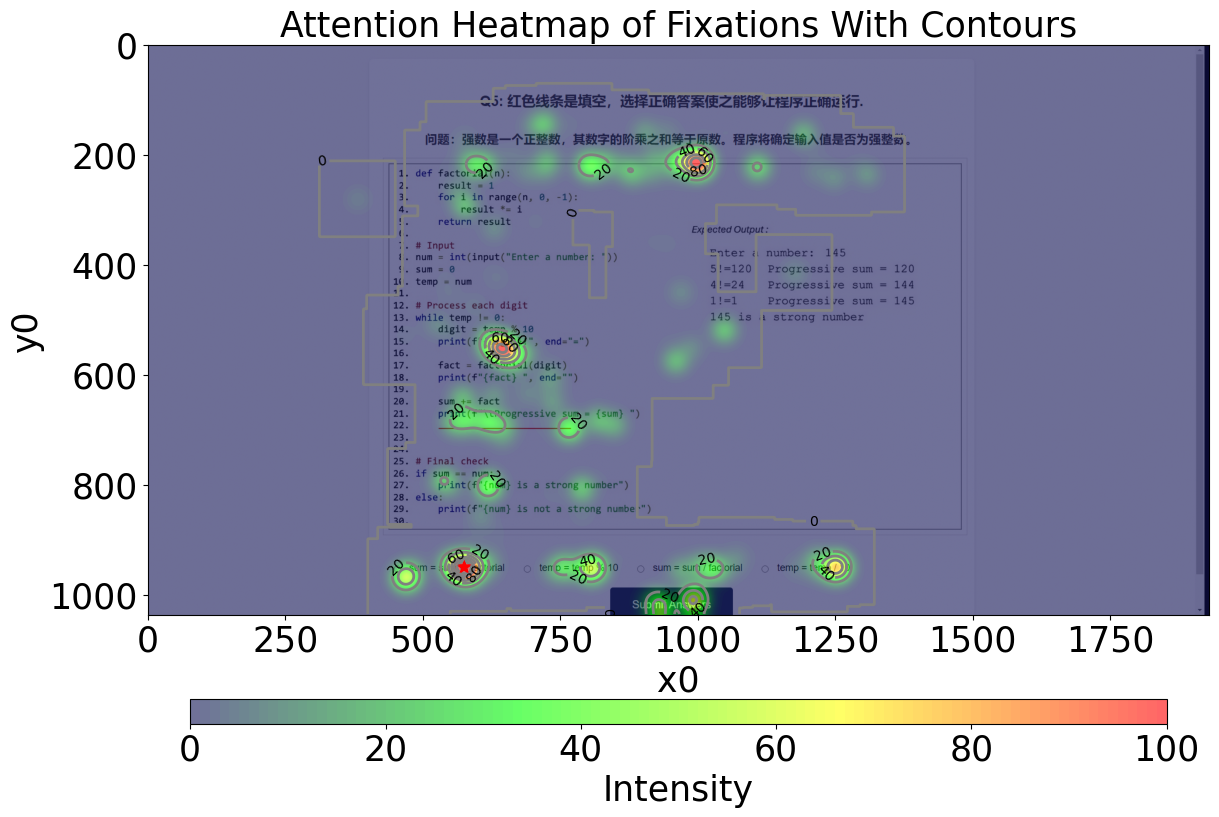

In [20]:
visualization.draw_heatmap(trial_data,contours=True,
                           figsize=(18, 10), alpha=0.6, sigma_value=17, 
                           vmin=0, vmax=100)

### By Task

In [ ]:
trial_id = 'introduction-Q5'

In [22]:
trial_data = pd.DataFrame()
trial_data = eye_events.loc[eye_events['trial_id'] == trial_id]


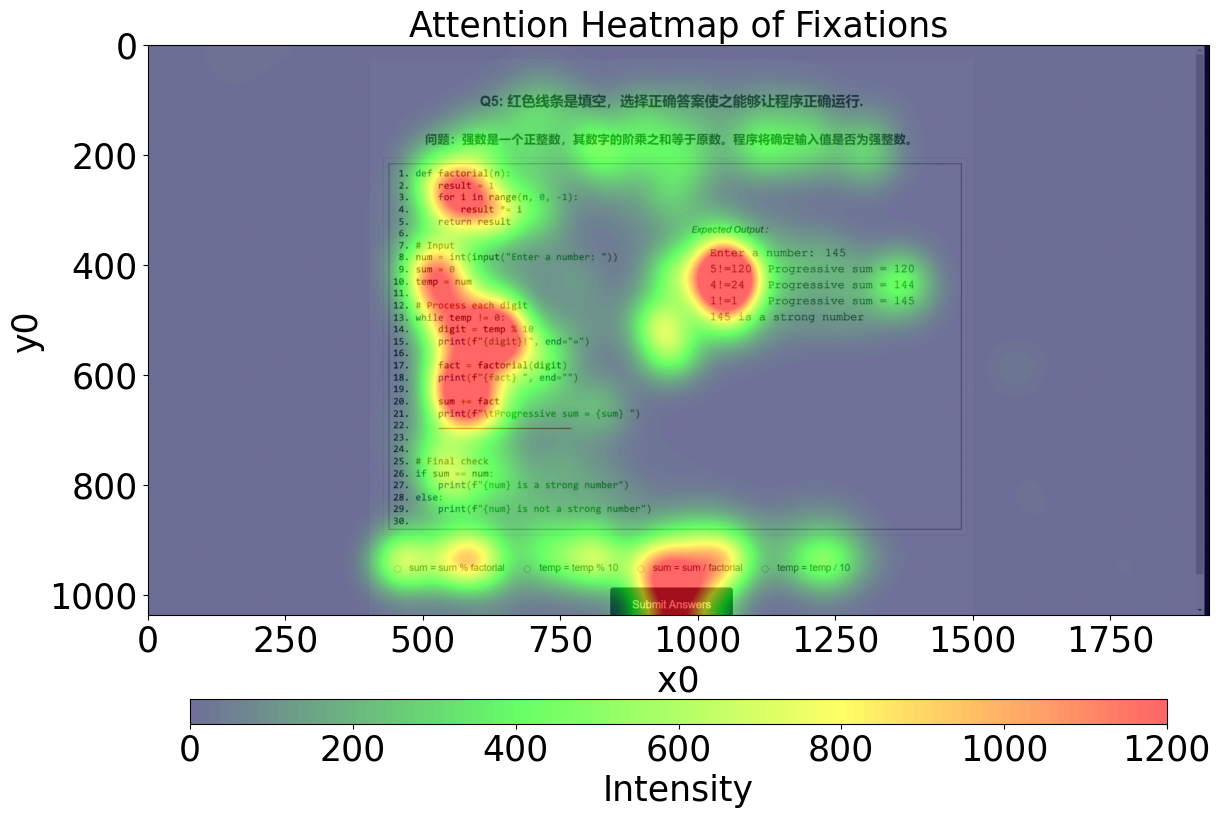

In [23]:
visualization.draw_heatmap(trial_data,contours=False, figsize=(18, 10), 
                           alpha=0.6, sigma_value=35, vmin=0, vmax=1200)

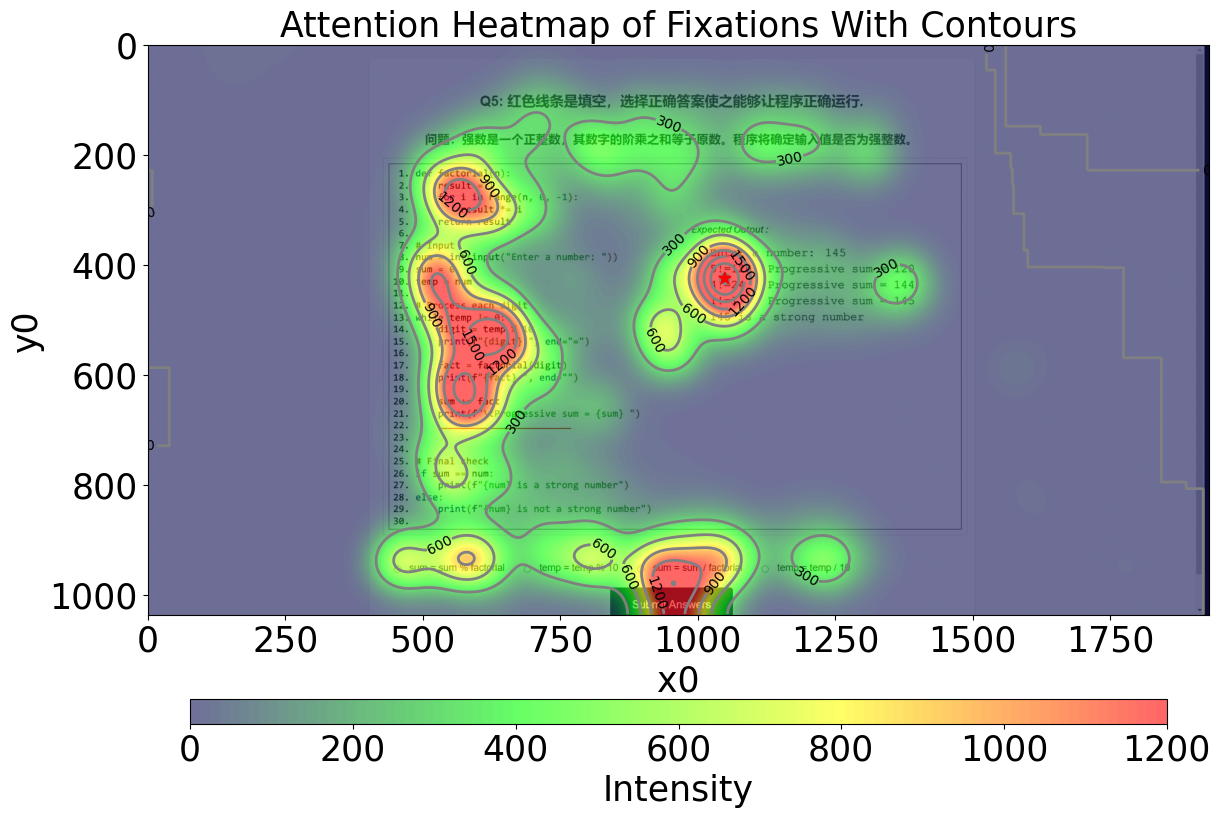

In [24]:
visualization.draw_heatmap(trial_data,contours=True,figsize=(18, 10),
                           alpha=0.6, sigma_value=35, vmin=0, vmax=1200)

# AOI Visionizer

## Fixations

### For Individual

In [26]:
participant_id = 'Participant52'
trial_id = 'introduction-Q5'

trial_data = pd.DataFrame()

In [32]:
# aoi_file_path = f"output/ymu_um/individual/aoi/{trial_id}/aoi_fixations_{trial_id}_{participant_id}.csv"
aoi_file_path = f"output/ymu_um/individual/aoi/aoi_fixations_introduction-Q5.csv"
aoi_file_path

'output/ymu_um/individual/aoi/aoi_fixations_introduction-Q5.csv'

In [33]:
trial_data = pd.read_csv(aoi_file_path)

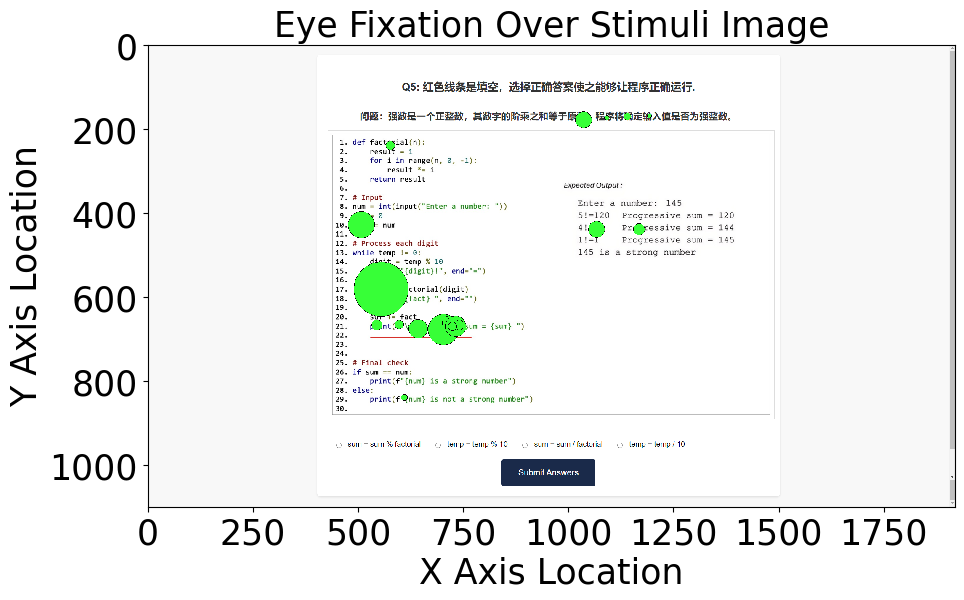

In [34]:
visualization.draw_trial(trial_data, 
                         draw_raw_data=False, draw_fixation=True,
                        draw_saccade=False, draw_aoi=False, 
                        sample_x_col="Gaze point X [DACS px]",
                        sample_y_col="Gaze point Y [DACS px]",
                        r3=3, r5=5)

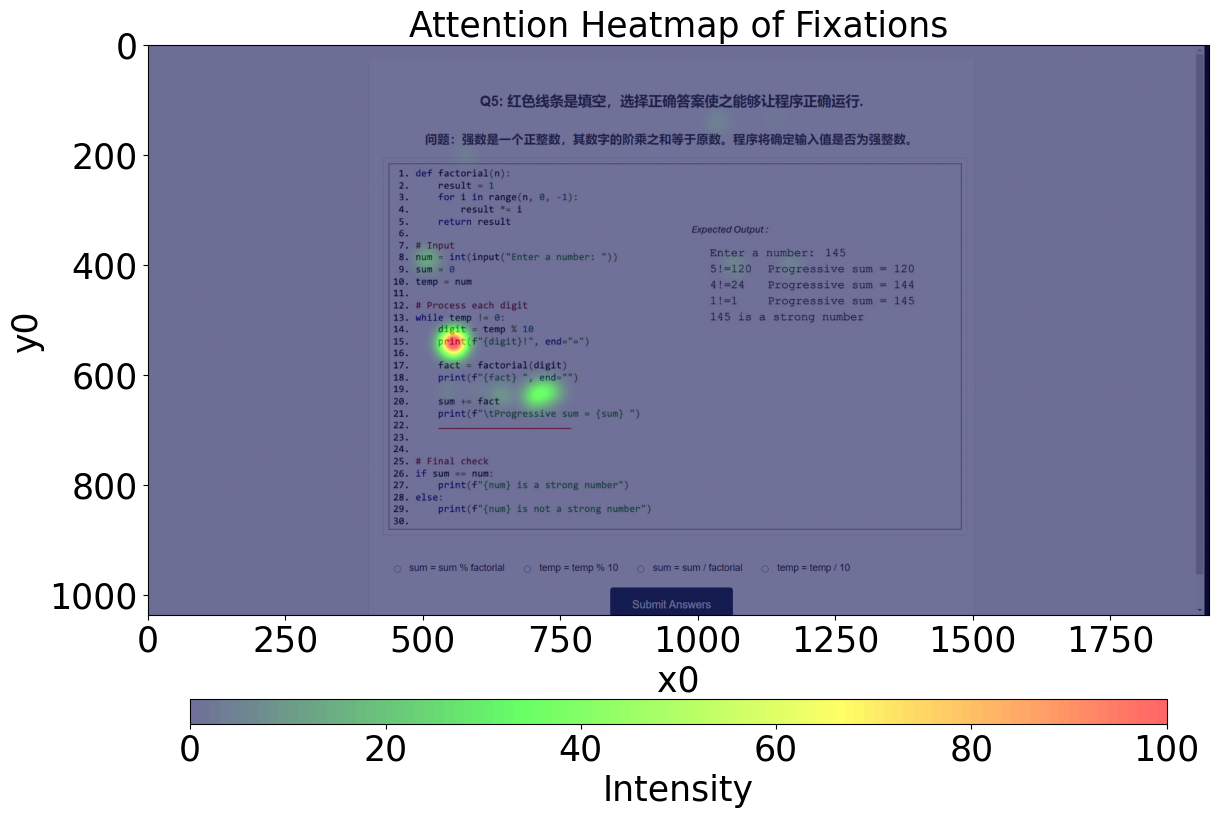

In [35]:
visualization.draw_heatmap(trial_data,contours=False,
                           figsize=(18, 10), alpha=0.6, sigma_value=17, 
                           vmin=0, vmax=100)

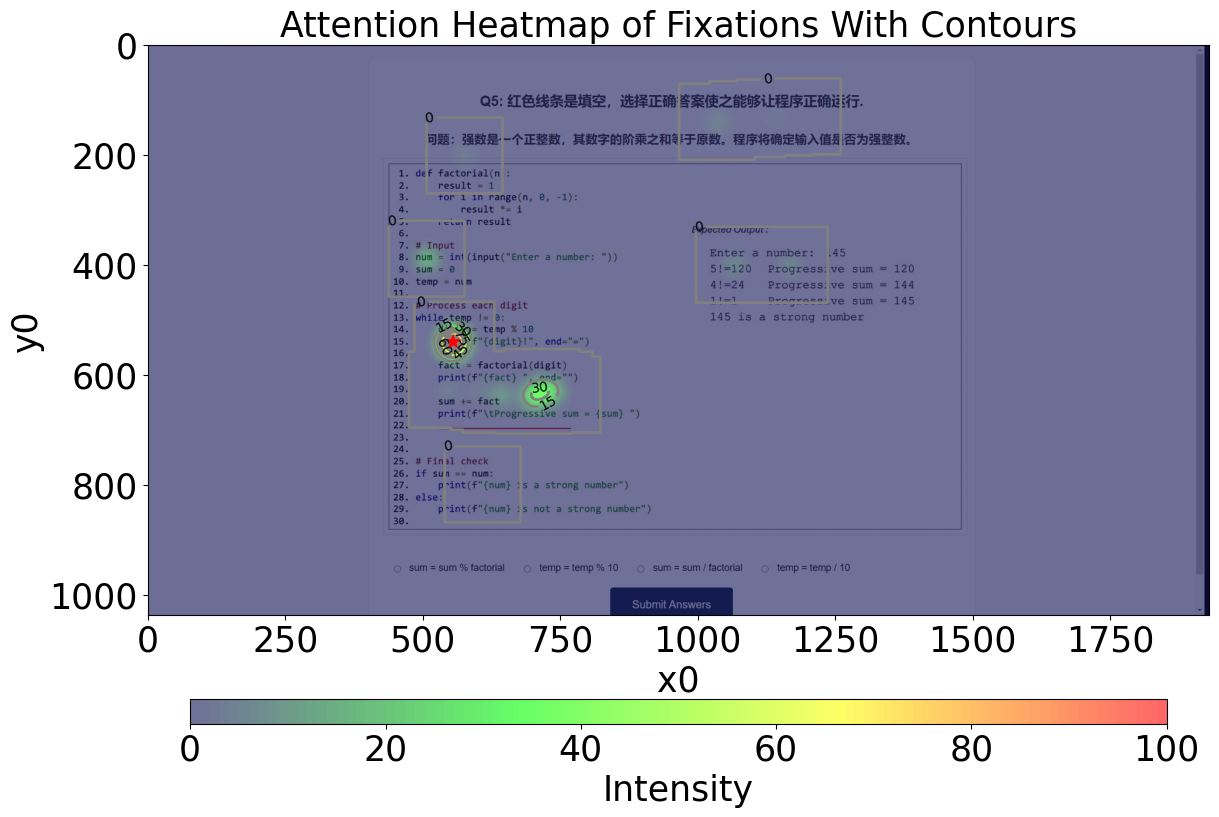

In [36]:
visualization.draw_heatmap(trial_data,contours=True,
                           figsize=(18, 10), alpha=0.6, sigma_value=17, 
                           vmin=0, vmax=100)

### For Task

In [33]:
import pandas as pd
from g2c import parsers, visualization, util, aoi

trial_id = 'introduction-Q5'

trial_data = pd.DataFrame()

In [34]:
# aoi_file_path = f"output/unl_um-30July/group/aoi/aoi_fixations_{trial_id}_nonopt.csv"
# aoi_file_path = f"output/unl_um-30July/group/aoi/aoi_fixations_{trial_id}.csv"
# aoi_file_path = f"../data/dump/lstm-cnn-attention_Q5_predictions_future.csv"
# aoi_file_path = f"output/ymu_um/group/aoi/aoi_fixations_{trial_id}_opt.csv"
aoi_file_path = f"../data/dump/lstm-cnn-attention_introduction-Q5_predictions_future_ymu.csv"
aoi_file_path

'../data/dump/lstm-cnn-attention_introduction-Q5_predictions_future_ymu.csv'

In [35]:
trial_data = pd.read_csv(aoi_file_path)

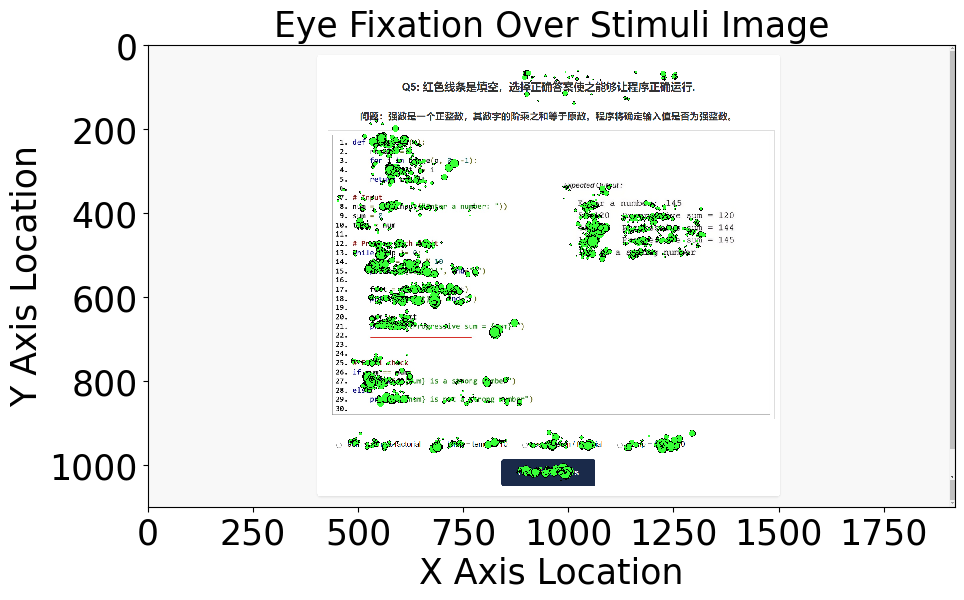

In [36]:
visualization.draw_trial(trial_data, 
                         draw_raw_data=False, draw_fixation=True,
                        draw_saccade=False, draw_aoi=False, 
                        sample_x_col="Gaze point X [DACS px]",
                        sample_y_col="Gaze point Y [DACS px]",
                        r3=.1, r5=1.)

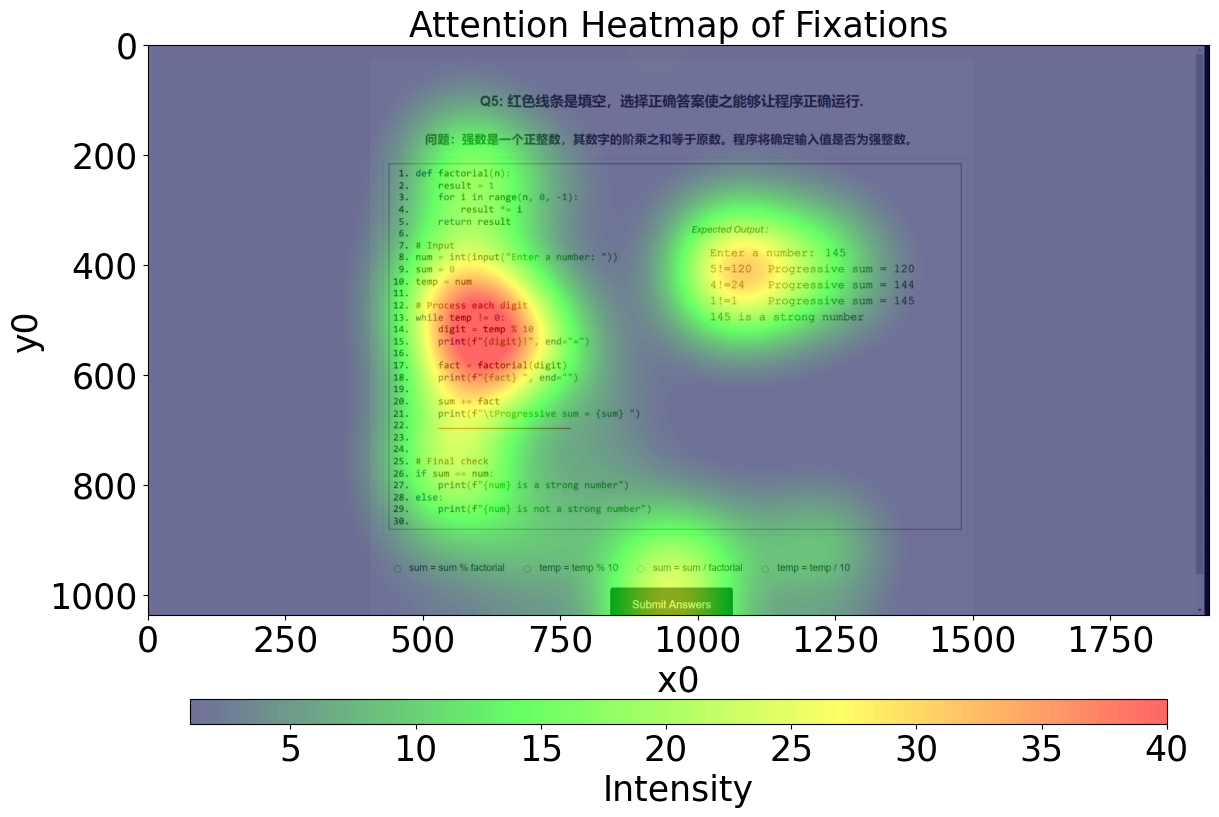

In [56]:
# default config
# visualization.draw_heatmap(trial_data,contours=False, figsize=(18, 10), 
#                            alpha=0.6, sigma_value=35, vmin=0, vmax=1200)
visualization.draw_heatmap(trial_data,contours=False,
                           figsize=(18, 10), alpha=0.6, sigma_value=80, 
                           vmin=1, vmax=40)

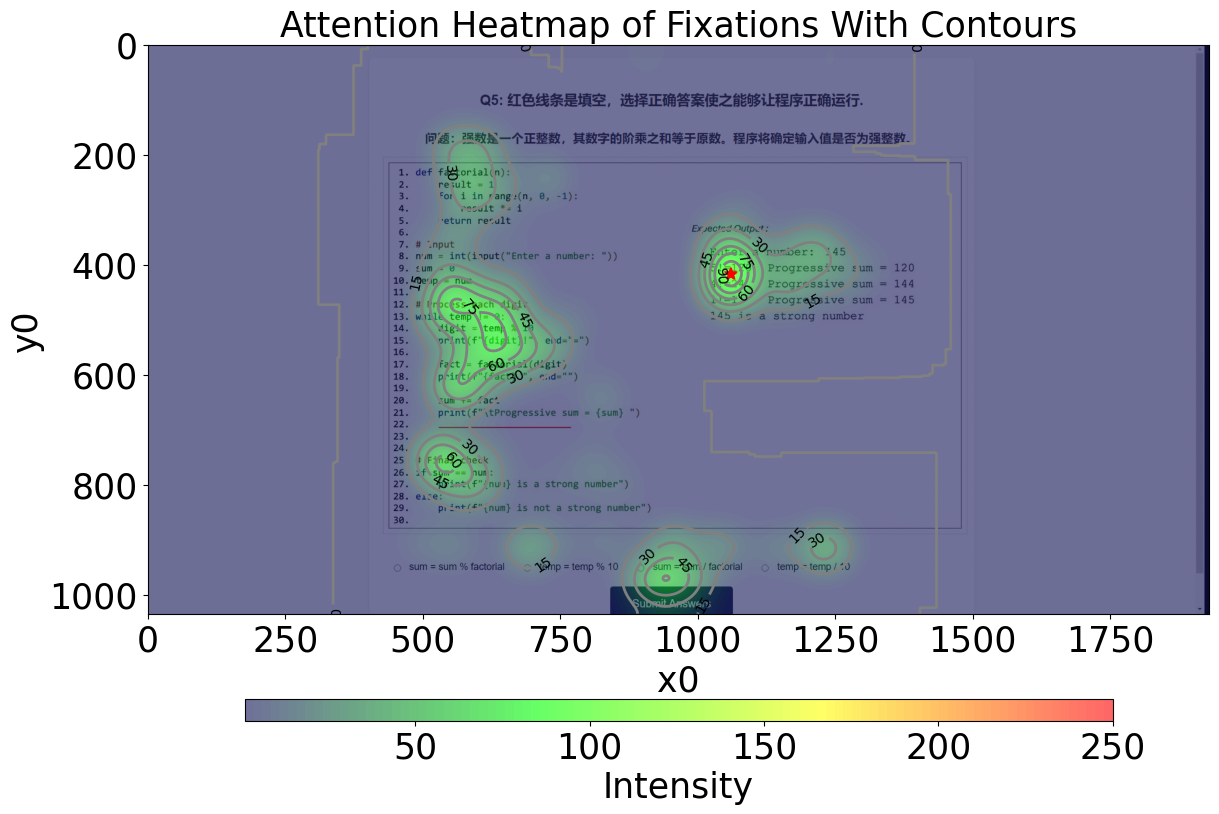

In [38]:
# default config
# visualization.draw_heatmap(trial_data,contours=True, figsize=(18, 10), 
#                            alpha=0.6, sigma_value=35, vmin=0, vmax=1200)
visualization.draw_heatmap(trial_data,contours=True,
                           figsize=(16, 10), alpha=0.6, sigma_value=35, 
                           vmin=1, vmax=250)